### Keras  API Task

In [3]:
from tensorflow.keras.datasets import mnist

mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [9]:
(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Sequential 부터 시작

In [6]:
import numpy as np

def get_preprocessed_data(images, targets) : 
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images,targets

train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [12]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

model = Sequential([

    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    
    # 두 번째 Hidden Layer
    Dense(64, activation='relu'),
    
    # 세 번째 Hidden Layer
    Dense(128, activation='relu'),
    
    # 마지막 Output Layer
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.0001), loss=CategoricalCrossentropy(), metrics=['acc'])

In [15]:
from tensorflow.keras.utils import to_categorical

train_oh_targets = to_categorical(train_targets)
test_oh_targets = to_categorical(test_targets)

print(train_oh_targets.shape, test_oh_targets.shape)

(60000, 10) (10000, 10)


In [16]:
history = model.fit(x=train_images, y=train_oh_targets, batch_size=128, epochs=20)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.4329 - loss: 23.4567
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8022 - loss: 2.8318
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8517 - loss: 1.6971
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8792 - loss: 1.2182
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8963 - loss: 0.9165
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9099 - loss: 0.7185
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9169 - loss: 0.6134
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9275 - loss: 0.5044
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9330 - loss: 0.4217
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9407 - loss: 0.3530
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9438 - loss: 0.3075
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9496 - loss: 0.2672
Epoch 13/20
469/469 ━━━━

In [17]:
print(history.history['loss'])
print('=' * 80)
history.history['acc']

[10.826173782348633, 2.4516289234161377, 1.5644804239273071, 1.1493980884552002, 0.9005122780799866, 0.7229815125465393, 0.5959742069244385, 0.4976411759853363, 0.421024352312088, 0.36238065361976624, 0.3119905889034271, 0.26962873339653015, 0.2327824831008911, 0.2068178504705429, 0.17984598875045776, 0.15906311571598053, 0.13983479142189026, 0.12095415592193604, 0.10975664108991623, 0.09758569300174713]


[0.6067500114440918,
 0.817383348941803,
 0.8586333394050598,
 0.8826166391372681,
 0.8976333141326904,
 0.909416675567627,
 0.9185166954994202,
 0.9276666641235352,
 0.9329333305358887,
 0.9398333430290222,
 0.9439166784286499,
 0.9488666653633118,
 0.9542499780654907,
 0.9572833180427551,
 0.9616000056266785,
 0.9644666910171509,
 0.9672999978065491,
 0.9716166853904724,
 0.9727500081062317,
 0.974566638469696]

In [18]:
np.expand_dims(test_images[0], axis=0).shape

(1, 28, 28)

In [19]:
pred_prob = model.predict(np.expand_dims(test_images[10], axis=0))
print(pred_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[[1.0000000e+00 5.4040365e-36 3.7282138e-23 3.3068803e-26 2.3248376e-24
  8.0030736e-24 1.4298311e-36 0.0000000e+00 7.7872387e-38 1.8246484e-22]]


In [35]:
from tensorflow.keras.datasets import mnist

(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [36]:
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [37]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, train_targets, stratify=train_targets, test_size=0.2, random_state=124)

train_oh_targets = to_categorical(train_targets)
validation_oh_targets = to_categorical(validation_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)


In [60]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [61]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    validation_data=(validation_images, validation_oh_targets), 
                    batch_size=32,
                    epochs=20,
                    verbose=2)

Epoch 1/20
1500/1500 - 4s - 2ms/step - acc: 0.9169 - loss: 0.2854 - val_acc: 0.9502 - val_loss: 0.1715
Epoch 2/20
1500/1500 - 2s - 1ms/step - acc: 0.9616 - loss: 0.1272 - val_acc: 0.9632 - val_loss: 0.1315
Epoch 3/20
1500/1500 - 2s - 1ms/step - acc: 0.9716 - loss: 0.0920 - val_acc: 0.9654 - val_loss: 0.1229
Epoch 4/20
1500/1500 - 2s - 1ms/step - acc: 0.9776 - loss: 0.0713 - val_acc: 0.9623 - val_loss: 0.1270
Epoch 5/20
1500/1500 - 2s - 1ms/step - acc: 0.9815 - loss: 0.0585 - val_acc: 0.9700 - val_loss: 0.1070
Epoch 6/20
1500/1500 - 2s - 1ms/step - acc: 0.9845 - loss: 0.0477 - val_acc: 0.9724 - val_loss: 0.1062
Epoch 7/20
1500/1500 - 2s - 1ms/step - acc: 0.9866 - loss: 0.0401 - val_acc: 0.9697 - val_loss: 0.1182
Epoch 8/20
1500/1500 - 2s - 2ms/step - acc: 0.9898 - loss: 0.0316 - val_acc: 0.9678 - val_loss: 0.1206
Epoch 9/20
1500/1500 - 2s - 1ms/step - acc: 0.9900 - loss: 0.0292 - val_acc: 0.9685 - val_loss: 0.1276
Epoch 10/20
1500/1500 - 2s - 2ms/step - acc: 0.9918 - loss: 0.0249 - val_

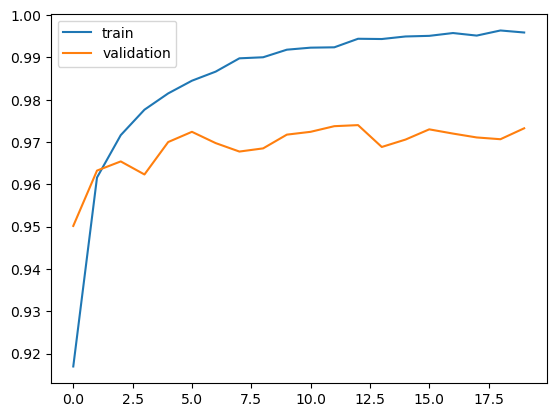

In [62]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show()

In [63]:
np.expand_dims(test_images[0], axis=0).shape

(1, 28, 28)

In [64]:
pred_prob = model.predict(np.expand_dims(test_images[0], axis=0))
print(pred_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[2.1939903e-13 9.1624116e-14 2.4192659e-09 3.7215122e-09 1.7631409e-15
  1.5508969e-11 4.1031640e-15 1.0000000e+00 2.4660230e-12 1.2546862e-10]]


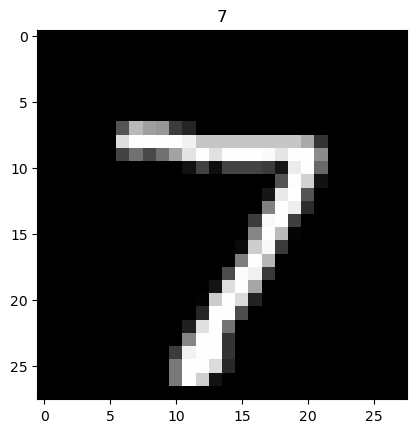

In [65]:
import matplotlib.pyplot as plt

class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']


plt.imshow(test_images[0], cmap='gray')
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()

### Functional API를 활용하여 분석

In [66]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model

INPUT_SIZE = 28

def create_model() :
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model

In [82]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [83]:
from tensorflow.keras.datasets import mnist

(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [84]:
model = create_model()
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [86]:
history = model.fit(x=train_images,
                   y=train_oh_targets,
                   batch_size=64,
                   epochs=20,
                   validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8354 - loss: 0.5913 - val_acc: 0.9438 - val_loss: 0.1859
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9510 - loss: 0.1651 - val_acc: 0.9564 - val_loss: 0.1451
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9676 - loss: 0.1109 - val_acc: 0.9622 - val_loss: 0.1227
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9752 - loss: 0.0845 - val_acc: 0.9678 - val_loss: 0.1016
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9793 - loss: 0.0665 - val_acc: 0.9694 - val_loss: 0.0959
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9841 - loss: 0.0545 - val_acc: 0.9688 - val_loss: 0.1026
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9874 - loss: 0.0428 - val_acc: 0.9738 - val_loss: 0.0875
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9888 - loss: 0.0357 - val_acc: 0.9675 - val_loss: 0.1125
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

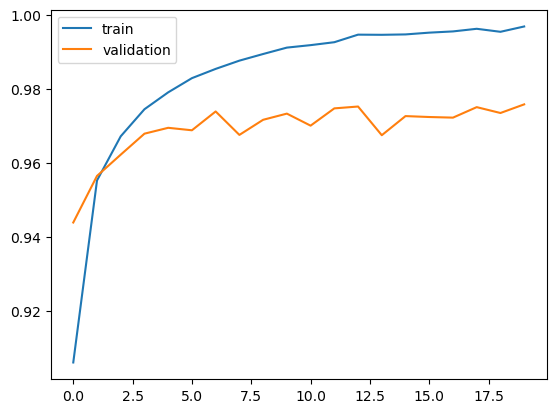

In [87]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

In [88]:
pred_prob = model.predict(np.expand_dims(test_images[7000], axis=0))
print(pred_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[3.20403121e-14 9.99999642e-01 1.15753975e-08 7.78269373e-15
  2.37311710e-07 6.08501314e-13 2.97009604e-11 1.56138583e-07
  6.18336138e-09 2.77358492e-09]]


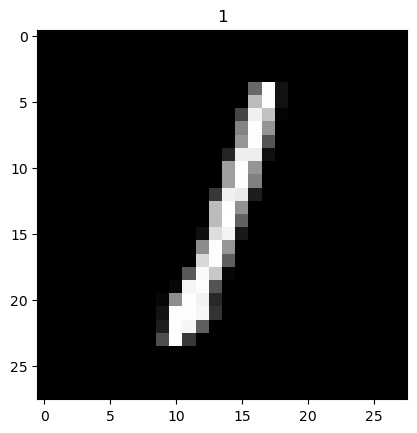

In [89]:
import matplotlib.pyplot as plt

class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']


plt.imshow(test_images[7000], cmap='gray')
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()

In [113]:
class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

def show_images(images, targets, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[targets[i]])



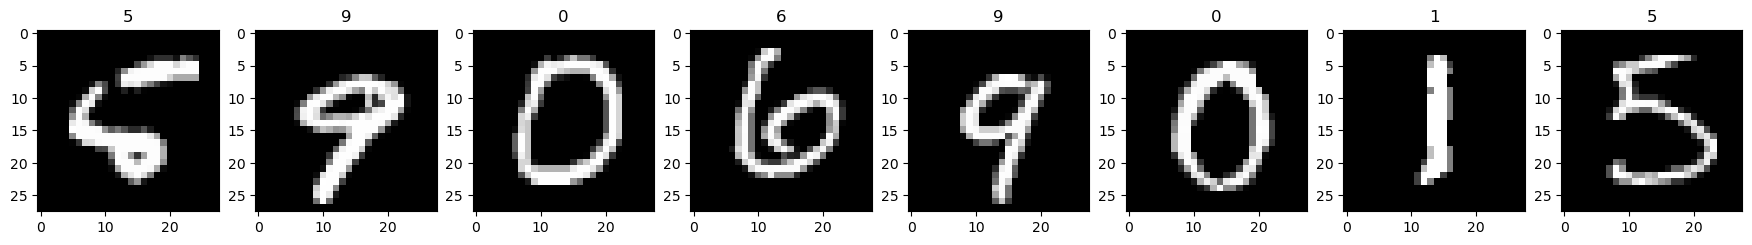

In [117]:
show_images(test_images[8:16], test_targets[8:16])